<a href="https://colab.research.google.com/github/hungry4089/--1/blob/main/205655_%ED%99%A9%EC%8A%B9%ED%98%84_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install koreanize-matplotlib  #한글설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

from google.colab import files
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential

데이터 불러오기

In [ ]:
uploaded = files.upload()

Saving 전력 revenge3.csv to 전력 revenge3.csv


numpy 배열로 로드

In [ ]:
data_raw = np.loadtxt('전력 revenge3.csv', delimiter=',', dtype='object')
print(data_raw)             #데이터 확인
print(data_raw.shape)       #행수,열수
print(data_raw.dtype)       #데이터 타입 확인

[['year' 'monty' 'day' ... 'Busan' 'Seoul' 'Electricity demand']
 ['2014' '1' '1' ... '8' '8.6' '1199.18481']
 ['2014' '1' '2' ... '3.6' '6.6' '1402.68571']
 ...
 ['2018' '12' '29' ... '11.4' '6' '1560.37522']
 ['2018' '12' '30' ... '12.6' '4.5' '1458.56819']
 ['2018' '12' '31' ... '9.3' '3.3' '1552.51832']]
(1827, 8)
object


In [ ]:
data_a=data_raw[1:,3:]              #제목, 날짜데이터 제거
data=data_a.astype('float')         #실수형으로 변환
np.set_printoptions(suppress=True)  #소수점 형식으로 표시
print(data.dtype)
print(data)

float64
[[   1.         5.2        8.         8.6     1199.18481]
 [   0.         1.4        3.6        6.6     1402.68571]
 [   0.        -2.7       -1.         9.9     1466.2479 ]
 ...
 [   1.         8.3       11.4        6.      1560.37522]
 [   1.         8.        12.6        4.5     1458.56819]
 [   0.         7.7        9.3        3.3     1552.51832]]


In [ ]:
x_data=data[:,:4]                        #1~4열: 입력 데이터
y_data=data[:,4:]                        #5열: 출력 데이터
print(x_data,'\n\n',y_data,'\n')         #데이터 확인
print(x_data.shape[0],y_data.shape[0])   #shape[0]-행의 수 shape[1]-열의 수
print(x_data.shape[1],y_data.shape[1])

[[ 1.   5.2  8.   8.6]
 [ 0.   1.4  3.6  6.6]
 [ 0.  -2.7 -1.   9.9]
 ...
 [ 1.   8.3 11.4  6. ]
 [ 1.   8.  12.6  4.5]
 [ 0.   7.7  9.3  3.3]] 

 [[1199.18481]
 [1402.68571]
 [1466.2479 ]
 ...
 [1560.37522]
 [1458.56819]
 [1552.51832]] 

1826 1826
4 1


전처리(정규화)

In [ ]:
scaler = MinMaxScaler()                 # 데이터를 최소값과 최대값을 기준으로 0과 1사이의 값으로 변환
x_scaled = scaler.fit_transform(x_data) # 입력데이터를 MinMaxScaler으로 스케일링
x_scaled

array([[1.        , 0.28666667, 0.2939759 , 0.38369781],
       [0.        , 0.20222222, 0.18795181, 0.34393638],
       [0.        , 0.11111111, 0.07710843, 0.40954274],
       ...,
       [1.        , 0.35555556, 0.37590361, 0.33200795],
       [1.        , 0.34888889, 0.40481928, 0.30218688],
       [0.        , 0.34222222, 0.3253012 , 0.27833002]])

전체의 90%를 학습셋으로, 10%를 테스트셋으로 지정

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1643, 4) (1643, 1) (183, 4) (183, 1)


모델 구조 생성

In [ ]:
model=Sequential()                                                   #Sequential: 층(layer)을 순차적으로 쌓아서 신경망 모델을 만드는 방식
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  #노드(은닉층)의 수:64개, 입력층:입력 데이터 열의 수(4개), 활성화 함수-relu
model.add(Dense(32, activation='relu'))                              #노드(은닉층)의 수:32개, relu:0보다 크면 그대로, 0이하일땐 0, 출력 범위: (0, ∞)
model.add(Dense(1))                                                  #출력층:학습에 대한 예측값
model.summary()                                                      #모델의 각 층(layer)에 대한 정보를 요약

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2433 (9.50 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


모델 실행

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # val_loss가 20번 이상 좋아지지 않는다면 조기종료(과적합 방지)
checkpoint = ModelCheckpoint(filepath="best_model", monitor='val_loss', verbose=1, save_best_only=True) #학습 과정 중 가장 좋은 성능의 모델을 저장

# 모델 훈련
history = model.fit(X_train, y_train, epochs=1000, batch_size=8, validation_split=0.3, callbacks=[early_stopping, checkpoint])

Epoch 1/1000
141/144 [============================>.] - ETA: 0s - loss: 1562920.0000 - mse: 1562920.0000
Epoch 1: val_loss improved from inf to 740695.50000, saving model to best_model
144/144 [==============================] - 4s 20ms/step - loss: 1540961.6250 - mse: 1540961.6250 - val_loss: 740695.5000 - val_mse: 740695.5000
Epoch 2/1000
130/144 [==========================>...] - ETA: 0s - loss: 435759.5000 - mse: 435759.5000
Epoch 2: val_loss improved from 740695.50000 to 445053.78125, saving model to best_model
144/144 [==============================] - 2s 11ms/step - loss: 437145.5938 - mse: 437145.5938 - val_loss: 445053.7812 - val_mse: 445053.7812
Epoch 3/1000
130/144 [==========================>...] - ETA: 0s - loss: 380426.1562 - mse: 380426.1562
Epoch 3: val_loss improved from 445053.78125 to 411933.40625, saving model to best_model
144/144 [==============================] - 2s 11ms/step - loss: 383274.8125 - mse: 383274.8125 - val_loss: 411933.4062 - val_mse: 411933.4062
Epo

손실값 시각화

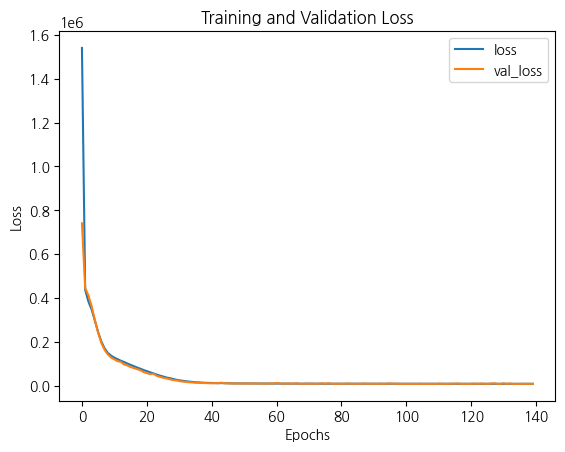

In [ ]:
plt.plot(history.history['loss'], label='loss')         #훈련 데이터에 대한 손실 함수의 값
plt.plot(history.history['val_loss'], label='val_loss') #검증 데이터에 대한 손실 함수의 값
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()                                            #그래프에 범례 추가
plt.show()

지금까지 학습한 모델로 검증 데이터에 대한 예측 수행

6/6 [==============================] - 0s 2ms/step


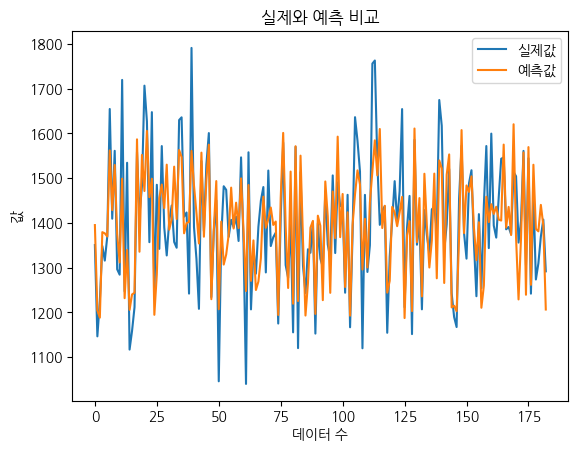

In [ ]:
predicted_values = model.predict(X_test)    #학습한 모델에 테스트할 입력값을 넣은 예측값

plt.plot(y_test, label='실제값')
plt.plot(predicted_values, label='예측값')
plt.title('실제와 예측 비교')
plt.xlabel('데이터 수')
plt.ylabel('값')
plt.legend()
plt.show()

데이터가 너무 많으니 마지막 부분 값만 출력

In [ ]:
real_prices =[]   #실제 값 리스트 생성
pred_prices = []  #예측 값 리스트 생성
X_num = []        #실행 번호 리스트 생성
repet=50          #출력 갯수 설정
num = len(y_test)-repet

for i in range(repet):                                  #반복문
    real = y_test[len(y_test)-repet+i]                  #실제 결과값 리스트에서 값 호출
    prediction = predicted_values[len(y_test)-repet+i]  #예측 결과값 리스트에서 값 호출
    real_prices.append(real)                            #real 값을 real_prices 리스트에 추가
    pred_prices.append(prediction)                      #prediction값을 pred_prices 리스트에 추가
    num = num + 1
    X_num.append(num)                                   #num값을 X_num리스트에 추가

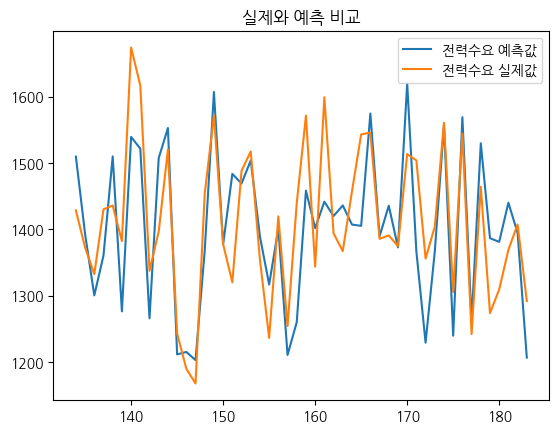

In [ ]:
# 그래프를 통해 샘플로 뽑은 50개의 값을 비교
plt.plot(X_num, pred_prices, label='전력수요 예측값')   #주어진 데이터 시퀀스를 사용하여 선 그래프 출력.(x축, y축, 제목)
plt.plot(X_num, real_prices, label='전력수요 실제값')
plt.title('실제와 예측 비교')
plt.legend()
plt.show()